In [1]:
#paquetes 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
#from random import shuffle
import math
import pandas as pd
from scipy import optimize


/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


PARA CADA RED: Me quedo con la componente gigante y me saco de encima el resto. Primero, voy a calcular, para todos los nodos de todas las redes, los siguientes parámetros: 

-degree centrality https://networkx.github.io/documentation/networkx-1.10/reference/algorithms.centrality.html 

-eigenvector centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality 

-subgraph centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.communicability_centrality.html#networkx.algorithms.centrality.communicability_centrality 

-shortest-path centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality 

-current flow betweeness centrality https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.current_flow_betweenness_centrality.html#networkx.algorithms.centrality.current_flow_betweenness_centrality 

Ordeno mis nodos de mayor a menor para cada parametro. Voy sacando de a un nodo y me fijo de que tamaño queda el hub más grande. Eje x es fracción de nodos sacados, y eje y es la fracción de nodos en el hub más grande. y=nodos en el componene gigante/tamaño de componente gigante original

Después, para la tabla 3, veo el efecto de sacar todos (nro=E) mis nodos esenciales. Además, veo el efecto de sacar E nodos no esenciales (osea la misma cantidad que esenciales haya en la red) de manera random, pero respetando el grado. Por ejemplo, si tengo 10 esenciales de grado 8 y 16 esenciales de grado 7, tengo que sacar 10 noesenciales de grado 8 y 16 noesenciales de grado 7 etc... Eso se hace muchass veces de manera random y se calcula el valor medio y dispersion..

Comentario: En realidad, lo formalmente bien seria ir redefiniendo todos mis parametros en cada iteración, pero como tardaria mil años, entonces lo hago "cada tanto". Saco ponele los 10 mas grandes y recalculo parametros en mi nueva componente gigante, etc etc Despues puedo comparar si realmente cambia o no, y cuánto.

# RED AP-MS

# Me quedo con la componente gigante

In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

def grafo(datosRed):
    G = nx.Graph()
    for i in range(np.shape(datosRed)[0]):
        G.add_edges_from([(datosRed[i][0],datosRed[i][1])])
    return G 

In [3]:
APMS = ldata('yeast_AP-MS.txt')
GAPMS = grafo(APMS)

In [4]:
Gc = max(nx.connected_component_subgraphs(GAPMS), key=len)

# Calculo coeficientes de centralidad

In [5]:
degrees=dict(Gc.degree())
#eigenvectors=nx.eigenvector_centrality(Gc)
#subgraph=sc = nx.communicability_betweenness_centrality(Gc)
#shortpath=nx.betweenness_centrality(Gc)
#currentflow=nx.current_flow_betweenness_centrality(Gc)


In [6]:
#FUNCIÓN QUE ORDENA LOS NODOS DE MANERA DECRECIENTE SEGÚN PARÁMETRO DEL 'CRITERIO'
def ordenanodos(criterio): #criterio=diccionario 'nombredenodo':valor de parametro
    parametro=criterio.values()
    parametroordenado=sorted(set(parametro),reverse=True)
    nodosordenados=[]
    for j in parametroordenado:
        for key,value in criterio.items():
            if value==j:
                nodosordenados.append(key)
    return(nodosordenados)

In [7]:
#FUNCIÓN QUE ORDENA LOS NODOS DE MANERA DECRECIENTE SEGÚN PARÁMETRO DEL 'CRITERIO' PARA CUANDO TENGO MUCHOS SUBRAFOS.
#Sirve cuando tengo que calcular los parametros para cada subgrafo por separado. Ejemplo:current flow.

def ordena_nodos(listadecriterios): #lista de criterios= [criterio1, criterio2,...,criterioN]
    parametro=[]
    for i in range(len(listadecriterios)):
        parametro = sum([parametro, list(listadecriterios[i].values())], [])
    parametroordenado=sorted(set(parametro),reverse=True)
    nodosordenados=[]
    for j in parametroordenado:
        for k in listadecriterios:            
            for key,value in k.items():
                if value==j:
                    nodosordenados.append(key)
    return(nodosordenados)

# Ordeno nodos según coeficientes de mayor a menor

In [8]:
DegreeImp=ordenanodos(degrees)
#EigenvectorImp=ordenanodos(eigenvectors)
#SubgraphImp=ordenanodos(subgraph)
#ShortpathImp=ordenanodos(shortpath)
#CurrentflowImp=ordenanodos(currentflow)

# Voy a empezar, sacando de a un nodo por DEGREE (por ahora sin recalcular los coeficientes)

In [14]:
GcDesarmable = max(nx.connected_component_subgraphs(GAPMS), key=len) #Me creo una copia de la componente Gigante Original.
LengthOriginalGc=len(Gc)
FractionNodes=np.linspace(1,650,650)/LengthOriginalGc
LargestGc=[]
for nodo in DegreeImp[0:650]:
    GcDesarmable.remove_node(nodo)
    LargestGc.append(float(len(max(nx.connected_component_subgraphs(GcDesarmable), key=len)))/LengthOriginalGc)


Text(0,0.5,'Largest Giant Component')

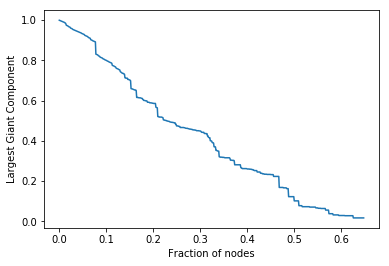

In [160]:
plt.plot(FractionNodes,LargestGc)
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')

# Otra vez, pero ahora recalculando.. cambiará? 

In [15]:
GcDesarmable2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionNodes2=np.linspace(1,600,600)/LengthOriginalGc
LargestGc2=[]
for i in range(120):
    degrees2=dict(GcDesarmable2.degree())
    DegreeImp2=ordenanodos(degrees2)
    for j in range(5):
        GcDesarmable2.remove_node(DegreeImp2[j])
        LargestGc2.append(float(len(max(nx.connected_component_subgraphs(GcDesarmable2), key=len)))/LengthOriginalGc)


In [9]:
GcDesarmable3 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionNodes3=np.linspace(1,200,200)/LengthOriginalGc
LargestGc3=[]
for i in range(200):
    degrees3=dict(GcDesarmable3.degree())
    DegreeImp3=ordenanodos(degrees3)
    for j in range(1):
        GcDesarmable3.remove_node(DegreeImp3[j])
        LargestGc3.append(float(len(max(nx.connected_component_subgraphs(GcDesarmable3), key=len)))/LengthOriginalGc)


In [16]:
FractionNodes3=np.linspace(1,200,200)/LengthOriginalGc


In [20]:
plt.plot(FractionNodes2,LargestGc2,label='recalculando cada 5') #en azul
plt.plot(FractionNodes,LargestGc,label='sin recalcular') #en naranja
plt.plot(FractionNodes3,LargestGc3,label='recalculando cada 1') #en naranja

plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

AttributeError: module 'matplotlib.colors' has no attribute 'to_rgba'

# Vamos ahora con EIGENVECTORS

In [12]:
eigenvectors=nx.eigenvector_centrality(Gc)
EigenvectorImp=ordenanodos(eigenvectors)

In [13]:
GcEigen = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionEigen=np.linspace(1,650,650)/LengthOriginalGc
LargestGcEigen=[]
for nodo in EigenvectorImp[0:650]:
    GcEigen.remove_node(nodo)
    LargestGcEigen.append(float(len(max(nx.connected_component_subgraphs(GcEigen), key=len)))/LengthOriginalGc)


KeyboardInterrupt: 

In [ ]:
n=120  #600/m
m=5  #CADA CUANTO RECALCULO
GcEigen2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionEigen2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcEigen2=[]
for i in range(n):
    eigenvectors2=nx.eigenvector_centrality_numpy(GcEigen2)
    EigenvectorImp2=ordenanodos(eigenvectors2)
    for j in range(m):
        GcEigen2.remove_node(EigenvectorImp2[j])
        LargestGcEigen2.append(float(len(max(nx.connected_component_subgraphs(GcEigen2), key=len)))/LengthOriginalGc)


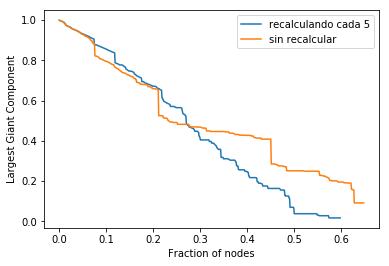

In [24]:
plt.plot(FractionEigen2,LargestGcEigen2,label='recalculando cada 5') #en azul
plt.plot(FractionEigen,LargestGcEigen,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# Vamos ahora con SHORTEST PATH

In [116]:
shortpath=nx.betweenness_centrality(Gc)
ShortpathImp=ordenanodos(shortpath)

GcShort = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionShort=np.linspace(1,650,650)/LengthOriginalGc
LargestGcShort=[]
for nodo in ShortpathImp[0:650]:
    GcShort.remove_node(nodo)
    LargestGcShort.append(float(len(max(nx.connected_component_subgraphs(GcShort), key=len)))/LengthOriginalGc)


In [138]:
n=120  #600/m
m=5  #CADA CUANTO RECALCULO
GcShort2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionShort2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcShort2=[]
for i in range(n):
    shortpath2=nx.betweenness_centrality(GcShort2)
    ShortImp2=ordenanodos(shortpath2)
    for j in range(m):
        GcShort2.remove_node(ShortImp2[j])
        LargestGcShort2.append(float(len(max(nx.connected_component_subgraphs(GcShort2), key=len)))/LengthOriginalGc)


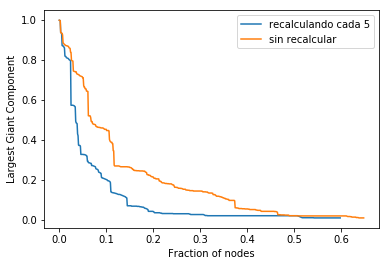

In [132]:
plt.plot(FractionShort2,LargestGcShort2,label='recalculando cada 5') #en azul
plt.plot(FractionShort,LargestGcShort,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# Vamos ahora con CURRENT FLOW

In [129]:
currentflow=nx.current_flow_betweenness_centrality(Gc)
CurrentflowImp=ordenanodos(currentflow)

GcCurrent = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionCurrent=np.linspace(1,650,650)/LengthOriginalGc
LargestGcCurrent=[]
for nodo in CurrentflowImp[0:650]:
    GcCurrent.remove_node(nodo)
    LargestGcCurrent.append(float(len(max(nx.connected_component_subgraphs(GcCurrent), key=len)))/LengthOriginalGc)


In [143]:
n=70  #600/m
m=5  #CADA CUANTO RECALCULO
GcCurrent2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionCurrent2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcCurrent2=[]
for i in range(n):
    currentflow2=nx.current_flow_betweenness_centrality(max(nx.connected_component_subgraphs(GcCurrent2),key=len))
    CurrentflowImp2=ordenanodos(currentflow2)
    for j in range(m):
        GcCurrent2.remove_node(CurrentflowImp2[j])
        LargestGcCurrent2.append(float(len(max(nx.connected_component_subgraphs(GcCurrent2), key=len)))/LengthOriginalGc)


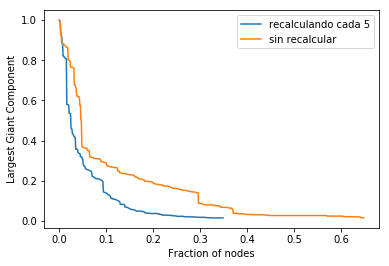

In [144]:
plt.plot(FractionCurrent2,LargestGcCurrent2,label='recalculando cada 5') #en azul
plt.plot(FractionCurrent,LargestGcCurrent,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# por ultimo, SUBGRAPH

In [9]:
subgraph=nx.subgraph_centrality(Gc)
SubgraphImp=ordenanodos(subgraph)

GcSubgraph = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionSubgraph=np.linspace(1,650,650)/LengthOriginalGc
LargestGcSubgraph=[]
for nodo in SubgraphImp[0:650]:
    GcSubgraph.remove_node(nodo)
    LargestGcSubgraph.append(float(len(max(nx.connected_component_subgraphs(GcSubgraph), key=len)))/LengthOriginalGc)


In [12]:
n=120  #600/m
m=5  #CADA CUANTO RECALCULO
GcSubgraph2 = max(nx.connected_component_subgraphs(GAPMS), key=len)
LengthOriginalGc=len(Gc)
FractionSubgraph2=np.linspace(1,n*m,n*m)/LengthOriginalGc
LargestGcSubgraph2=[]
for i in range(n):
    subgraph2=nx.nx.subgraph_centrality(GcSubgraph2)
    SubgraphImp2=ordenanodos(subgraph2)
    for j in range(m):
        GcSubgraph2.remove_node(SubgraphImp2[j])
        LargestGcSubgraph2.append(float(len(max(nx.connected_component_subgraphs(GcSubgraph2), key=len)))/LengthOriginalGc)


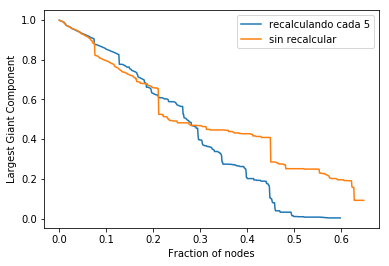

In [13]:
plt.plot(FractionSubgraph2,LargestGcSubgraph2,label='recalculando cada 5') #en azul
plt.plot(FractionSubgraph,LargestGcSubgraph,label='sin recalcular') #en naranja
plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# Me guardo todo en .txt

In [25]:
DegreeAPMS=np.zeros((len(FractionNodes2),2))
DegreeAPMS[:,0]=FractionNodes2
DegreeAPMS[:,1]=LargestGc2

EigenAPMS=np.zeros((len(FractionEigen2),2))
EigenAPMS[:,0]=FractionEigen2
EigenAPMS[:,1]=LargestGcEigen2

ShortpathAPMS=np.zeros((len(FractionShort2),2))
ShortpathAPMS[:,0]=FractionShort2
ShortpathAPMS[:,1]=LargestGcShort2

CurrentflowAPMS=np.zeros((len(FractionCurrent2),2))
CurrentflowAPMS[:,0]=FractionCurrent2
CurrentflowAPMS[:,1]=LargestGcCurrent2



NameError: name 'FractionNodes2' is not defined

In [14]:
SubgraphAPMS=np.zeros((len(FractionSubgraph2),2))
SubgraphAPMS[:,0]=FractionSubgraph2
SubgraphAPMS[:,1]=LargestGcSubgraph2

In [15]:
#np.savetxt('DegreeAPMS.txt', DegreeAPMS, delimiter=',')
#np.savetxt('EigenAPMS.txt', EigenAPMS, delimiter=',')
#np.savetxt('ShortpathAPMS.txt', ShortpathAPMS, delimiter=',')
#np.savetxt('CurrentflowAPMS.txt', CurrentflowAPMS, delimiter=',') 
#np.savetxt('SubgraphAPMS.txt', SubgraphAPMS, delimiter=',') 


# Importo para graficar

In [10]:
DegreeAPMS=np.loadtxt('DegreeAPMS.txt',delimiter=',')
EigenAPMS=np.loadtxt('EigenAPMS.txt',delimiter=',')
ShortpathAPMS=np.loadtxt('ShortpathAPMS.txt',delimiter=',')
CurrentflowAPMS=np.loadtxt('CurrentflowAPMS.txt',delimiter=',')
SubgraphAPMS=np.loadtxt('SubgraphAPMS.txt',delimiter=',')

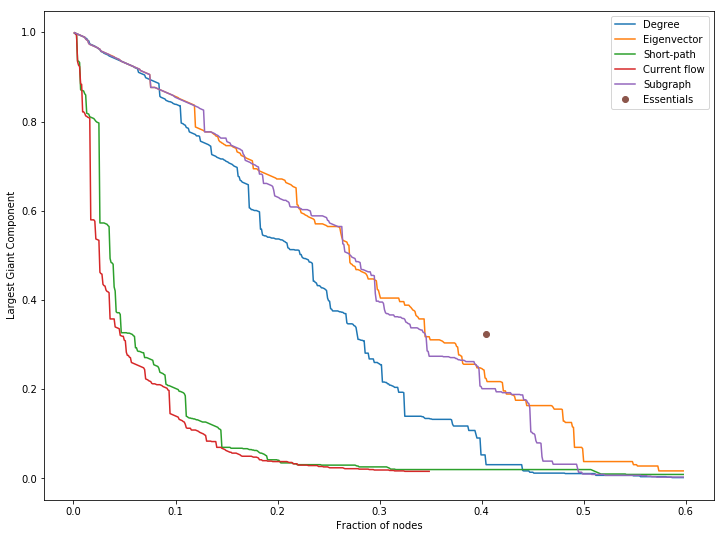

In [53]:
plt.figure(figsize=(12,9))
plt.plot(DegreeAPMS[:,0],DegreeAPMS[:,1],label='Degree') 
plt.plot(EigenAPMS[:,0],EigenAPMS[:,1],label='Eigenvector') 
plt.plot(ShortpathAPMS[:,0],ShortpathAPMS[:,1],label='Short-path') 
plt.plot(CurrentflowAPMS[:,0],CurrentflowAPMS[:,1],label='Current flow')
plt.plot(SubgraphAPMS[:,0],SubgraphAPMS[:,1],label='Subgraph')
plt.plot(FractionNodesEsenencial,LargestGcEsencial,'o', label='Essentials')


plt.xlabel('Fraction of nodes')
plt.ylabel('Largest Giant Component')
plt.legend()

# Queda pendiente...

Ir sacando de manera random los nodos

Sacar los que son esenciales

Descubrir qué comando encuentra la subgraph centrality

# Asignación de esencialidad a nodos

In [18]:
essentiality=ldata('Essential.txt')

ess=[]
for i in range(len(essentiality)):
    ess.append(essentiality[i][1])
    
def essentiality(nodo): 
    if len({nodo}.intersection(set(ess)))==0:
        e=0
    else:
        e=1
    return e    

dict_ess = { nodo: essentiality(nodo) for nodo  in GAPMS.nodes() }

def AssignEssentiality(G,dict_ess):
    for n in G.nodes:
        G.nodes[n]["essentiality"] = dict_ess[n]
    return

AssignEssentiality(GAPMS,dict_ess)

In [44]:
#Te devuelve una lista de los nodos esenciales de un grafo
def NodosEsenciales(G):
    nodosesenciales=[]
    for nodo in list(set(G.nodes())):
        if G.nodes.data("essentiality")[nodo]==1:
            nodosesenciales.append(nodo)
    return(nodosesenciales)
    

# Saco los nodos esenciales de mi componente gigante

In [46]:
GcEsencial = max(nx.connected_component_subgraphs(GAPMS), key=len) #Me creo una copia de la componente Gigante Original.
LengthOriginalGc=len(Gc)
nodosesenciales=NodosEsenciales(GcEsencial)
for nodo in nodosesenciales:
    GcEsencial.remove_node(nodo)
FractionNodesEsenencial=float(len(nodosesenciales))/LengthOriginalGc
LargestGcEsencial=float(len(max(nx.connected_component_subgraphs(GcEsencial), key=len)))/LengthOriginalGc


In [48]:
print(FractionNodesEsenencial,LargestGcEsencial)

0.4043824701195219 0.3237051792828685
